## Lecture3: Data wrangling

---
* Author:  [Yuttapong Mahasittiwat](mailto:khala1391@gmail.com)
* Technologist | Data Modeler | Data Analyst
* [YouTube](https://www.youtube.com/khala1391)
* [LinkedIn](https://www.linkedin.com/in/yuttapong-m/)
---

## Source
- File: 
  - superstore: [**Kaggle**](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)<br>
  - flight delay: [**Kaggle**](https://www.kaggle.com/datasets/usdot/flight-delays?select=flights.csv)<br>
- Source: [**CPE352 Data Science** by **Santitham**](https://youtu.be/rRNLxo6fZwI?si=aHmjJ_58CCcemKVC)

note
- shape
- describe
- head
- tail
- column
- df.select_dtypes
- filter
- sort
- add/remove column
- dropna
- fillna
- merge, concat
- groupby .split, apply, combine  (aggregate)
- partition: groupby for
- reshape: pivot, melt

In [5]:
import numpy as np
import pandas as pd
print("numpy version :",np.__version__)
print("pandas version :",pd.__version__)

numpy version : 1.26.4
pandas version : 2.2.1


In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
print("matplotlib version :",mpl.__version__)

matplotlib version : 3.8.4


In [8]:
from PIL import Image
from IPython.display import display

### Problem1: RFM
- recency
- frequency
- monetary

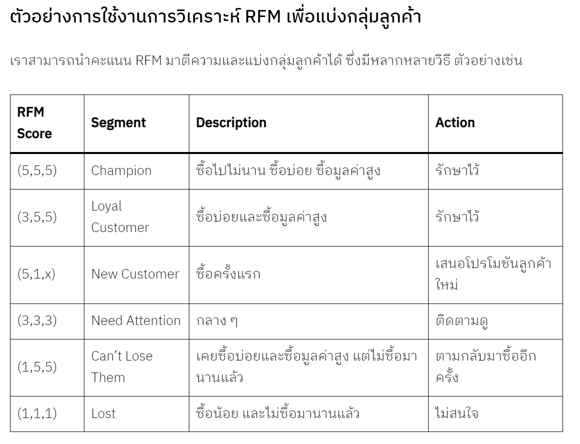

https://bdi.or.th/big-data-101/rfm-analysis-2/


In [124]:
img = Image.open('figure/rfm.png')
w,h = img.size
s = 0.5
img = img.resize((int(s*w),int(s*h)))
display(img)

print('https://bdi.or.th/big-data-101/rfm-analysis-2/')

#### Load data

In [127]:
df = pd.read_csv('data/Sample-Superstore.csv', encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#### check datatype

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [130]:
df = df.astype({'Order Date':'datetime64[ns]',
                'Ship Date': 'datetime64[ns]',
                'Postal Code': 'object'
               })

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   object        
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

#### get current date

In [135]:
# import datetime
# datetime.datetime.now()

In [192]:
currentdate = df['Order Date'].max()
currentdate

Timestamp('2017-12-30 00:00:00')

In [194]:
firstdate = df['Order Date'].min()
firstdate

Timestamp('2014-01-03 00:00:00')

In [141]:
(currentdate-df['Order Date']).dt.days  # series: use dt.*

0        417
1        417
2        566
3        811
4        811
        ... 
9989    1439
9990     307
9991     307
9992     307
9993     240
Name: Order Date, Length: 9994, dtype: int64

#### define recency function

In [144]:
# check concept
# df[df['Customer ID'] == 'CG-12520']['Order Date'].max()
(currentdate-df[df['Customer ID'] == 'CG-12520']['Order Date'].max()).days

338

In [145]:
def recency(x):
    return (currentdate-x.max()).days

#### recency of each customer

In [149]:
df.groupby('Customer ID').agg({'Order Date': recency})

,Order Date
Customer ID,
AA-10315,184
AA-10375,19
AA-10480,259
AA-10645,55
AB-10015,415
...,...
XP-21865,43
YC-21895,4
YS-21880,9


#### Add freqency of each customer 

In [151]:
df['Customer ID'].nunique()

793

In [152]:
df.groupby('Customer ID').agg({'Order Date': recency, 'Order ID': 'nunique'})

,Order Date,Order ID
Customer ID,,
AA-10315,184,5
AA-10375,19,9
AA-10480,259,4
AA-10645,55,6
AB-10015,415,3
...,...,...
XP-21865,43,11
YC-21895,4,5
YS-21880,9,8


#### add monetary of each customer

In [154]:
df.groupby('Customer ID').agg({'Order Date': recency,
                               'Order ID': 'nunique',
                              'Sales': 'sum'})

,Order Date,Order ID,Sales
Customer ID,,,
AA-10315,184,5,5563.560
AA-10375,19,9,1056.390
AA-10480,259,4,1790.512
AA-10645,55,6,5086.935
AB-10015,415,3,886.156
...,...,...,...
XP-21865,43,11,2374.658
YC-21895,4,5,5454.350
YS-21880,9,8,6720.444


#### rename columns

In [157]:
df.groupby('Customer ID')\
  .agg({'Order Date': recency,
        'Order ID': 'nunique',
        'Sales': 'sum'})\
  .rename(columns ={
        'Order Date': 'R',
        'Order ID': 'F',
        'Sales': 'M'})

,R,F,M
Customer ID,,,
AA-10315,184,5,5563.560
AA-10375,19,9,1056.390
AA-10480,259,4,1790.512
AA-10645,55,6,5086.935
AB-10015,415,3,886.156
...,...,...,...
XP-21865,43,11,2374.658
YC-21895,4,5,5454.350
YS-21880,9,8,6720.444


#### convert values to quartiles

In [160]:
rfmdata = df.groupby('Customer ID')\
            .agg({'Order Date': recency,
                  'Order ID': 'nunique',
                  'Sales': 'sum'})\
            .rename(columns ={
                  'Order Date': 'R',
                  'Order ID': 'F',
                  'Sales': 'M'})

In [161]:
rfmdata.transform(lambda x: pd.qcut(x, q=4, labels=False))

,R,F,M
Customer ID,,,
AA-10315,3,0,3
AA-10375,0,3,0
AA-10480,3,0,1
AA-10645,1,1,3
AB-10015,3,0,0
...,...,...,...
XP-21865,1,3,2
YC-21895,0,0,3
YS-21880,0,2,3


In [162]:
pd.cut(df['Sales'],4)

0       (-22.194, 5659.953]
1       (-22.194, 5659.953]
2       (-22.194, 5659.953]
3       (-22.194, 5659.953]
4       (-22.194, 5659.953]
               ...         
9989    (-22.194, 5659.953]
9990    (-22.194, 5659.953]
9991    (-22.194, 5659.953]
9992    (-22.194, 5659.953]
9993    (-22.194, 5659.953]
Name: Sales, Length: 9994, dtype: category
Categories (4, interval[float64, right]): [(-22.194, 5659.953] < (5659.953, 11319.462] < (11319.462, 16978.971] < (16978.971, 22638.48]]

In [163]:
pd.crosstab(pd.cut(df['Sales'],4),'amount')

col_0,amount
Sales,
"(-22.194, 5659.953]",9979
"(5659.953, 11319.462]",12
"(11319.462, 16978.971]",1
"(16978.971, 22638.48]",2


In [165]:
pd.crosstab(pd.qcut(df['Sales'],4),'amount')

col_0,amount
Sales,
"(0.443, 17.28]",2501
"(17.28, 54.49]",2496
"(54.49, 209.94]",2499
"(209.94, 22638.48]",2498


### Problem2: Monthly Sale Trends as crosstab

#### compute monthly sales

In [168]:
MonthlySales = df.set_index('Order Date')\
                .groupby(['Category','Sub-Category'])['Sales']\
                .resample('ME')\
                .sum()\
                .reset_index()
MonthlySales.head()

,Category,Sub-Category,Order Date,Sales
0,Furniture,Bookcases,2014-01-31,1010.055
1,Furniture,Bookcases,2014-02-28,0.000
2,Furniture,Bookcases,2014-03-31,1706.446
3,Furniture,Bookcases,2014-04-30,308.499
4,Furniture,Bookcases,2014-05-31,640.631


#### convert order date to period

In [196]:
MonthlySales['Order Date'] = MonthlySales['Order Date'].dt.to_period('M')
MonthlySales.head()

,Category,Sub-Category,Order Date,Sales
0,Furniture,Bookcases,2014-01,1010.055
1,Furniture,Bookcases,2014-02,0.000
2,Furniture,Bookcases,2014-03,1706.446
3,Furniture,Bookcases,2014-04,308.499
4,Furniture,Bookcases,2014-05,640.631


#### Cross Tabulation

In [205]:
MonthlySales.pivot_table(
    index = ['Category','Sub-Category'],
    columns= 'Order Date',
    values= 'Sales', aggfunc='sum'
)

Order Date                     2014-01   2014-02    2014-03   2014-04  \
Category        Sub-Category                                            
Furniture       Bookcases     1010.055     0.000   1706.446   308.499   
                Chairs        4187.700   190.458   5713.142  3210.666   
                Furnishings    711.770   392.980    480.128   984.046   
                Tables         333.000  1256.220   6674.240  3441.626   
Office Supplies Appliances     312.580    89.920    502.962   532.580   
                Art            176.990    73.664    413.268   567.916   
                Binders        814.508   339.262   1525.675   985.752   
                Envelopes      194.360     0.000    353.200   408.352   
                Fasteners       37.060    12.350     48.240   101.684   
                Labels          44.746    36.876    173.590    78.992   
                Paper          242.020   138.488   1200.322   625.432   
                Storage       3028.816   142.544   4370.002  3680.012   
                Supplies           NaN   238.620     18.620  4174.354   
Technology      Accessories    827.890  1120.990   1108.934  2545.990   
                Copiers            NaN       NaN        NaN       NaN   
                Machines           NaN       NaN  25314.658   287.968   
                Phones        2315.400   487.520   6087.582  6361.476   

Order Date                     2014-05    2014-06   2014-07    2014-08  \
Category        Sub-Category                                             
Furniture       Bookcases      640.631   759.5736  1487.673   794.2760   
                Chairs        3675.109  6456.0010  6364.940  2590.2420   
                Furnishings    780.166   432.7500   902.622   997.7580   
                Tables        1816.881  5557.8010  2065.816  2938.0705   
Office Supplies Appliances     918.596  2275.2460    81.740  2096.7530   
                Art            288.220   686.1120   256.040   203.6620   
                Binders       4372.304  4275.7930  2934.492  4251.3870   
                Envelopes      214.194    95.5600   136.864   203.3320   
                Fasteners       12.576    45.2920    24.348    85.8700   
                Labels          57.440   607.7260   194.790    41.3760   
                Paper          479.112  1090.1900   796.332  2017.3840   
                Storage        712.902  3849.5140  2452.732  2322.7300   
                Supplies        80.280    27.6040  8243.870   156.9680   
Technology      Accessories    695.490   667.0400  3308.692  1937.7340   
                Copiers       2999.930     0.0000   559.992  1749.9660   
                Machines         0.000   691.7610     0.000     0.0000   
                Phones        5904.456  7077.1640  4135.450  5521.9600   

Order Date                       2014-09   2014-10  ...     2017-03  \
Category        Sub-Category                        ...               
Furniture       Bookcases      2394.4698   616.998  ...   1928.1928   
                Chairs        13849.1850  6486.605  ...   5524.9140   
                Furnishings    2960.9560   621.812  ...    963.2340   
                Tables         4611.8700  4578.832  ...   2477.1040   
Office Supplies Appliances     2413.2640   430.792  ...   2473.6140   
                Art             759.8600   553.526  ...    442.0840   
                Binders       12743.6160   480.156  ...   2785.4880   
                Envelopes       381.3720   340.512  ...    517.0160   
                Fasteners        95.4780    51.988  ...     24.6800   
                Labels          381.5360    99.102  ...    224.1000   
                Paper          1445.3580   990.846  ...   2551.1000   
                Storage        8810.2240  3739.586  ...   3815.4520   
                Supplies        392.5900   524.620  ...   1716.7520   
Technology      Accessories    2459.5580  1767.510  ...   3952.2720   
                Copiers        1799.9700  1999.960  ...  21319.8220  

### Problem3: User Transaction Matrix

#### view potential input columns

In [216]:
df[['Order ID','Customer ID','Category', 'Sub-Category']]

,Order ID,Customer ID,Category,Sub-Category
0,CA-2016-152156,CG-12520,Furniture,Bookcases
1,CA-2016-152156,CG-12520,Furniture,Chairs
2,CA-2016-138688,DV-13045,Office Supplies,Labels
3,US-2015-108966,SO-20335,Furniture,Tables
4,US-2015-108966,SO-20335,Office Supplies,Storage
...,...,...,...,...
9989,CA-2014-110422,TB-21400,Furniture,Furnishings
9990,CA-2017-121258,DB-13060,Furniture,Furnishings
9991,CA-2017-121258,DB-13060,Technology,Phones
9992,CA-2017-121258,DB-13060,Office Supplies,Paper


#### use Pivot table to convert

In [224]:
df.pivot_table(index='Customer ID',
              columns=['Sub-Category'],
              values= 'Order ID',    # any is acceptable
              aggfunc= 'count',
              fill_value=0)    # fill Na

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Customer ID,,,,,,,,,,,,,,,,,
AA-10315,1,2,0,2,0,0,0,0,1,1,0,0,1,1,1,1,0
AA-10375,2,0,1,4,0,0,0,0,0,1,0,0,4,1,2,0,0
AA-10480,1,0,1,0,0,0,0,0,0,1,0,0,5,1,2,0,1
AA-10645,0,0,1,1,1,3,0,1,0,4,0,0,2,2,3,0,0
AB-10015,0,0,1,0,1,1,0,0,0,0,0,0,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XP-21865,3,2,4,4,0,0,0,1,1,4,0,0,7,0,2,0,0
YC-21895,0,0,1,0,0,0,1,0,0,1,0,0,2,1,2,0,0
YS-21880,1,0,1,2,0,1,0,1,0,1,0,0,0,0,4,0,1


### Problem4: building customer behavior profiles to max sales

#### Get Sales per Order ID

In [256]:
df.groupby(['Customer ID','Order ID','Order Date'], as_index= False).agg({'Sales': 'sum'})

,Customer ID,Order ID,Order Date,Sales
0,AA-10315,CA-2014-128055,2014-03-31,726.548
1,AA-10315,CA-2014-138100,2014-09-15,29.500
2,AA-10315,CA-2015-121391,2015-10-04,26.960
3,AA-10315,CA-2016-103982,2016-03-03,4406.072
4,AA-10315,CA-2017-147039,2017-06-29,374.480
...,...,...,...,...
5004,ZD-21925,CA-2014-143336,2014-08-27,244.760
5005,ZD-21925,CA-2016-152471,2016-07-08,839.944
5006,ZD-21925,CA-2016-167682,2016-04-03,331.080
5007,ZD-21925,CA-2017-141481,2017-06-11,61.440


#### Get 'Order ID' that has a maximum Sales

In [300]:
OrderMaxSales= df.groupby(['Customer ID','Order ID','Order Date'], as_index= False).agg({'Sales': 'sum'})\
            .set_index('Order ID')\
            .groupby(['Customer ID'],as_index=False)\
            .agg({'Sales':'idxmax'})\
            .rename(columns={'Sales':'Order ID'})
OrderMaxSales.head()

,Customer ID,Order ID
0,AA-10315,CA-2016-103982
1,AA-10375,CA-2016-131065
2,AA-10480,CA-2016-114601
3,AA-10645,CA-2015-110863
4,AB-10015,CA-2016-140935


#### Retrieve past 3 Order ID

In [292]:
df[['Customer ID','Order ID','Order Date']]\
    .drop_duplicates()\
    .sort_values(by=['Customer ID','Order Date'])

,Customer ID,Order ID,Order Date
2229,AA-10315,CA-2014-128055,2014-03-31
7468,AA-10315,CA-2014-138100,2014-09-15
1299,AA-10315,CA-2015-121391,2015-10-04
5198,AA-10315,CA-2016-103982,2016-03-03
1159,AA-10315,CA-2017-147039,2017-06-29
...,...,...,...
18,ZD-21925,CA-2014-143336,2014-08-27
5897,ZD-21925,CA-2016-167682,2016-04-03
3040,ZD-21925,US-2016-147991,2016-05-05
3814,ZD-21925,CA-2016-152471,2016-07-08


In [304]:
OrderRecord = df[['Customer ID','Order ID','Order Date']]\
                .drop_duplicates()\
                .sort_values(by=['Customer ID','Order Date'])
OrderRecord.head()

,Customer ID,Order ID,Order Date
2229,AA-10315,CA-2014-128055,2014-03-31
7468,AA-10315,CA-2014-138100,2014-09-15
1299,AA-10315,CA-2015-121391,2015-10-04
5198,AA-10315,CA-2016-103982,2016-03-03
1159,AA-10315,CA-2017-147039,2017-06-29


In [312]:
OrderMaxSales['MaxSales'] = 1    # create new column for reference

In [314]:
OrderRecord.merge(OrderMaxSales, on=['Customer ID','Order ID'], how ='left')

,Customer ID,Order ID,Order Date,MaxSales
0,AA-10315,CA-2014-128055,2014-03-31,NaN
1,AA-10315,CA-2014-138100,2014-09-15,NaN
2,AA-10315,CA-2015-121391,2015-10-04,NaN
3,AA-10315,CA-2016-103982,2016-03-03,1.0
4,AA-10315,CA-2017-147039,2017-06-29,NaN
...,...,...,...,...
5004,ZD-21925,CA-2014-143336,2014-08-27,NaN
5005,ZD-21925,CA-2016-167682,2016-04-03,NaN
5006,ZD-21925,US-2016-147991,2016-05-05,NaN
5007,ZD-21925,CA-2016-152471,2016-07-08,1.0


In [320]:
OrderRecord.merge(OrderMaxSales, on=['Customer ID','Order ID'], how ='left')\
    .groupby('Customer ID')['MaxSales'].shift(-1)

0       NaN
1       NaN
2       1.0
3       NaN
4       NaN
       ... 
5004    NaN
5005    NaN
5006    1.0
5007    NaN
5008    NaN
Name: MaxSales, Length: 5009, dtype: float64

In [354]:
OrderRecord_1 = OrderRecord.merge(OrderMaxSales, on=['Customer ID','Order ID'], how ='left')
OrderRecord_1['M1']= OrderRecord_1.groupby('Customer ID')['MaxSales'].shift(-1)
OrderRecord_1['M2']= OrderRecord_1.groupby('Customer ID')['MaxSales'].shift(-2)
OrderRecord_1['M3']= OrderRecord_1.groupby('Customer ID')['MaxSales'].shift(-3)
OrderRecord_1 = OrderRecord_1.fillna(0)
OrderRecord_1['PastRecords']= OrderRecord_1['M1'] + OrderRecord_1['M2'] + OrderRecord_1['M3']
OrderRecord_1.head()

,Customer ID,Order ID,Order Date,MaxSales,M1,M2,M3,PastRecords
0,AA-10315,CA-2014-128055,2014-03-31,0.0,0.0,0.0,1.0,1.0
1,AA-10315,CA-2014-138100,2014-09-15,0.0,0.0,1.0,0.0,1.0
2,AA-10315,CA-2015-121391,2015-10-04,0.0,1.0,0.0,0.0,1.0
3,AA-10315,CA-2016-103982,2016-03-03,1.0,0.0,0.0,0.0,0.0
4,AA-10315,CA-2017-147039,2017-06-29,0.0,0.0,0.0,0.0,0.0


#### Filter only customer consisting at least 3-month records back

In [365]:
OrderRecord_2 = OrderRecord_1.groupby('Customer ID', as_index=False).agg({'PastRecords':'sum'})
OrderRecord_2.head()

,Customer ID,PastRecords
0,AA-10315,3.0
1,AA-10375,3.0
2,AA-10480,2.0
3,AA-10645,2.0
4,AB-10015,2.0


In [371]:
SelectedCustomers = OrderRecord_2[OrderRecord_2['PastRecords'] == 3].drop(columns='PastRecords')
SelectedCustomers

,Customer ID
0,AA-10315
1,AA-10375
5,AB-10060
6,AB-10105
8,AB-10165
...,...
783,VP-21760
787,WB-21850
790,YS-21880
791,ZC-21910


#### Filter by inner join

In [379]:
OrderRecord_3 = OrderRecord_1[OrderRecord_1['PastRecords']==1]\
                .merge(SelectedCustomers, on ='Customer ID')\
                .drop(columns=['MaxSales','PastRecords'])
OrderRecord_3.head()

,Customer ID,Order ID,Order Date,M1,M2,M3
0,AA-10315,CA-2014-128055,2014-03-31,0.0,0.0,1.0
1,AA-10315,CA-2014-138100,2014-09-15,0.0,1.0,0.0
2,AA-10315,CA-2015-121391,2015-10-04,1.0,0.0,0.0
3,AA-10375,CA-2015-109939,2015-05-08,0.0,0.0,1.0
4,AA-10375,CA-2015-114503,2015-11-13,0.0,1.0,0.0


#### Melt M1-M3 to a column

In [424]:
OrderRecord_past = pd.melt(OrderRecord_3,
                          id_vars=['Customer ID','Order ID','Order Date'],
                          value_vars=['M1','M2','M3'],
                          var_name='Month',
                          value_name='Value')
OrderRecord_past = OrderRecord_past[OrderRecord_past['Value']>0]\
                    .drop(columns='Value')\
                    .sort_values(by=['Customer ID', 'Order Date'],ascending = False)
OrderRecord_past.head()

,Customer ID,Order ID,Order Date,Month
1076,ZD-21925,US-2016-147991,2016-05-05,M1
2152,ZD-21925,CA-2016-167682,2016-04-03,M2
3228,ZD-21925,CA-2014-143336,2014-08-27,M3
1073,ZC-21910,CA-2015-130365,2015-04-25,M1
2149,ZC-21910,CA-2015-133452,2015-04-13,M2


#### Prepare Transaction

In [427]:
sale_profit = df.groupby(['Customer ID', 'Order ID'], as_index=False)\
                .agg(({'Sales': 'sum', 'Profit': 'sum'}))
sale_profit.head()

,Customer ID,Order ID,Sales,Profit
0,AA-10315,CA-2014-128055,726.548,267.4224
1,AA-10315,CA-2014-138100,29.500,13.2826
2,AA-10315,CA-2015-121391,26.960,7.0096
3,AA-10315,CA-2016-103982,4406.072,-747.1021
4,AA-10315,CA-2017-147039,374.480,96.5050


#### Join Transaction Data

In [430]:
OrderRecord_past.merge(sale_profit, on=['Customer ID','Order ID'], how = 'inner')

,Customer ID,Order ID,Order Date,Month,Sales,Profit
0,ZD-21925,US-2016-147991,2016-05-05,M1,16.720,3.3440
1,ZD-21925,CA-2016-167682,2016-04-03,M2,331.080,146.8280
2,ZD-21925,CA-2014-143336,2014-08-27,M3,244.760,25.8774
3,ZC-21910,CA-2015-130365,2015-04-25,M1,349.082,-79.0382
4,ZC-21910,CA-2015-133452,2015-04-13,M2,910.792,-27.7534
...,...,...,...,...,...,...
1072,AA-10375,CA-2015-114503,2015-11-13,M2,84.960,6.3720
1073,AA-10375,CA-2015-109939,2015-05-08,M3,5.248,0.5904
1074,AA-10315,CA-2015-121391,2015-10-04,M1,26.960,7.0096
1075,AA-10315,CA-2014-138100,2014-09-15,M2,29.500,13.2826


In [432]:
OrderRecord_Final = OrderRecord_past.merge(sale_profit, on=['Customer ID','Order ID'], how = 'inner')\
                                    .pivot_table(index=['Customer ID'],
                                                columns= 'Month',
                                                values= ['Sales','Profit'],
                                                aggfunc='sum')
OrderRecord_Final

Profit                        Sales                  
Month              M1        M2        M3       M1       M2       M3
Customer ID                                                         
AA-10315       7.0096   13.2826  267.4224   26.960   29.500  726.548
AA-10375       1.4672    6.3720    0.5904   16.768   84.960    5.248
AB-10060       8.0997  106.5112    8.7138   27.930  334.200   18.540
AB-10105    -204.4458    5.8980 -142.6601  393.165  117.960  671.002
AB-10165      -2.9180   40.9680   -1.0656   46.688  199.640   37.296
...               ...       ...       ...      ...      ...      ...
VP-21760      31.6459 -116.8440  -87.3009  198.670  166.920  366.666
WB-21850     -32.5272   53.7944 -108.9542   30.392  126.176  258.495
YS-21880       1.5522   15.5250  -38.2116    9.552   34.500  436.704
ZC-21910     -79.0382  -27.7534  -50.6688  349.082  910.792   38.976
ZD-21925       3.3440  146.8280   25.8774   16.720  331.080  244.760

[359 rows x 6 columns]

### Exercise
- source: [flight delay](https://www.kaggle.com/datasets/usdot/flight-delays?select=flights.csv)
- which flight numbers (carrier + flight) worst delayed
- obtain the 10 worst flight number of each month

In [11]:
df = pd.read_csv('data/flights.csv',usecols=['MONTH','AIRLINE','FLIGHT_NUMBER','DEPARTURE_DELAY'],
                 dtype={'MONTH':'int32',
                        'AIRLINE': 'category',
                        'FLIGHT_NUMBER': 'category',
                       'DEPARTURE_DELAY': 'float32'})
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype   
---  ------           --------------    -----   
 0   MONTH            5819079 non-null  int32   
 1   AIRLINE          5819079 non-null  category
 2   FLIGHT_NUMBER    5819079 non-null  category
 3   DEPARTURE_DELAY  5732926 non-null  float32 
dtypes: category(2), float32(1), int32(1)
memory usage: 61.4 MB


In [12]:
df = df.dropna(how='any')
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5732926 entries, 0 to 5819078
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype   
---  ------           --------------    -----   
 0   MONTH            5732926 non-null  int32   
 1   AIRLINE          5732926 non-null  category
 2   FLIGHT_NUMBER    5732926 non-null  category
 3   DEPARTURE_DELAY  5732926 non-null  float32 
dtypes: category(2), float32(1), int32(1)
memory usage: 104.2 MB


In [13]:
df.head(5)

,MONTH,AIRLINE,FLIGHT_NUMBER,DEPARTURE_DELAY
0,1,AS,98,-11.0
1,1,AA,2336,-8.0
2,1,US,840,-2.0
3,1,AA,258,-5.0
4,1,AS,135,-1.0


In [17]:
df.columns

Index(['MONTH', 'AIRLINE', 'FLIGHT_NUMBER', 'DEPARTURE_DELAY'], dtype='object')

In [25]:
df = df.rename(columns=
               {'MONTH':'month',
                'AIRLINE':'carrier',
                'FLIGHT_NUMBER':'flight',
                'DEPARTURE_DELAY':'dep_delay'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5732926 entries, 0 to 5819078
Data columns (total 4 columns):
 #   Column     Dtype   
---  ------     -----   
 0   month      int32   
 1   carrier    category
 2   flight     category
 3   dep_delay  float32 
dtypes: category(2), float32(1), int32(1)
memory usage: 104.2 MB


#### flight numbers (carrier + flight) worst delayed

In [46]:
df.sort_values(by='dep_delay', ascending=False).head(10)

,month,carrier,flight,dep_delay
337720,1,AA,1322,1988.0
3412085,8,AA,96,1878.0
4103531,9,AA,1063,1670.0
5810811,12,AA,2214,1649.0
5279939,11,AA,2559,1631.0
3100911,7,AA,1319,1625.0
1278418,3,AA,1279,1609.0
264495,1,AA,224,1604.0
949876,3,AA,270,1589.0
886984,2,AA,1312,1587.0


#### obtain the 10 worst flight number of each month

In [43]:
df.groupby(by='month').apply(lambda x: x.sort_values(by='dep_delay', ascending=False).head(10), include_groups=False)

carrier flight  dep_delay
month                                  
1     337720       AA   1322     1988.0
      264495       AA    224     1604.0
      396544       AA   1242     1551.0
      311492       AA   2385     1457.0
      155090       AA   1595     1450.0
...               ...    ...        ...
12    5763733      AA    334     1258.0
      5747351      AA   1615     1239.0
      5729515      EV   5244     1236.0
      5624697      OO   4858     1233.0
      5642980      DL   2047     1228.0

[120 rows x 3 columns]